In [1]:
import torch
import os

In [2]:
import numpy as np
import torchvision.transforms as T

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sorted(os.listdir('/Users/yashsurange/Documents/GitHub/FER-from-static-images/CK+_Complete'))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

***
## dataset.py check

In [5]:
from dataset import ckplus
test_data=ckplus('./CK+_Complete/')

In [6]:
test_data.__getitem__(0)[0].shape

torch.Size([300, 300, 3])

In [7]:
image =test_data.__getitem__(0)[0]

In [8]:
image.permute(2,0,1).shape

torch.Size([3, 300, 300])

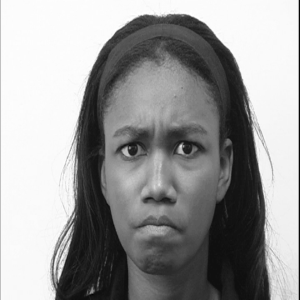

In [9]:
T.ToPILImage()(test_data.__getitem__(0)[0].permute(2,0,1))

****

## preprocessing.py check

In [10]:
image.shape

torch.Size([300, 300, 3])

In [11]:
from preprocessing import preprocessing_image

In [12]:
preprocessing_object=preprocessing_image()
image_after_clahe=preprocessing_object.clahe(image)

In [13]:
image_after_clahe.shape

(300, 300, 3)

***
## Clahe check

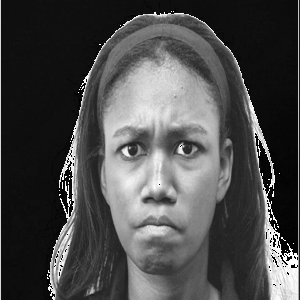

In [14]:
T.ToPILImage()(torch.tensor(image_after_clahe).permute(2,0,1))

****
## Face detection check

In [15]:
face=preprocessing_object.face_detection(image_after_clahe)

In [16]:
type(face)

numpy.ndarray

In [17]:
face.shape

(160, 160, 3)

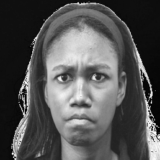

In [18]:
T.ToPILImage()(face)

***
## landmark anotation check

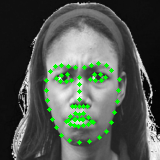

In [19]:
# actual landmaar
preprocessing_object.landmark_annotation(face)

*****
## Testing everything from start


In [20]:
final_test=test_data.__getitem__(0)[0]

In [21]:
final_test.shape

torch.Size([300, 300, 3])

In [22]:
type(final_test)

torch.Tensor

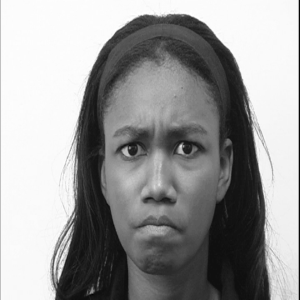

In [23]:
T.ToPILImage()(final_test.permute(2,0,1))

In [24]:
from preprocessing import preprocessing_image
preprocessing_ob=preprocessing_image()
after_clahe=preprocessing_ob.clahe(final_test)


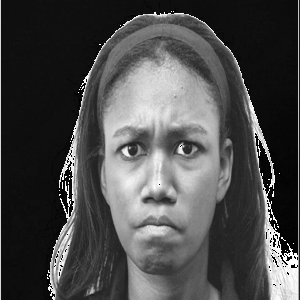

In [25]:
T.ToPILImage()(torch.tensor(after_clahe).permute(2,0,1))

In [26]:
face_detection=preprocessing_ob.face_detection(after_clahe)

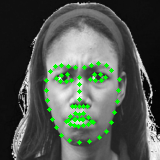

In [27]:
preprocessing_ob.landmark_annotation(face_detection)

### Checking all functions when batches of images are loaded

In [28]:
## Creating custom dataset

from dataset import ckplus
customdataset=ckplus('./CK+_Complete/')

In [29]:
from torch.utils.data import DataLoader
batch_size = 2  # Set your desired batch size
shuffle = True   # Set to True for training, False for evaluation (optional)

dataloader = DataLoader(customdataset, batch_size=batch_size, shuffle=shuffle)


In [30]:
for idx,(img,label) in enumerate(dataloader):
    batch_image=img
    dataloader=label
    break

## To make it compatible with batches